In [1]:
import kagglehub
path = kagglehub.dataset_download("vivek468/superstore-dataset-final")
print("Path to dataset files:", path)

100%|██████████| 550k/550k [00:00<00:00, 34.3MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vivek468/superstore-dataset-final/versions/1


In [2]:
import pandas as pd
data = pd.read_csv(path + '/Sample - Superstore.csv', encoding='latin1')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
data.duplicated().sum()

np.int64(0)

In [4]:
data.columns = data.columns.str.replace(" ", "_").str.lower()
data.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub-category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [5]:
data.columns = data.columns.str.replace("-", "_").str.lower()
data.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit'],
      dtype='object')

In [6]:
data.row_id.duplicated().sum()

np.int64(0)

In [7]:
data.isna().sum().reset_index()

,index,0
0,row_id,0
1,order_id,0
2,order_date,0
3,ship_date,0
4,ship_mode,0
5,customer_id,0
6,customer_name,0
7,segment,0
8,country,0
9,city,0


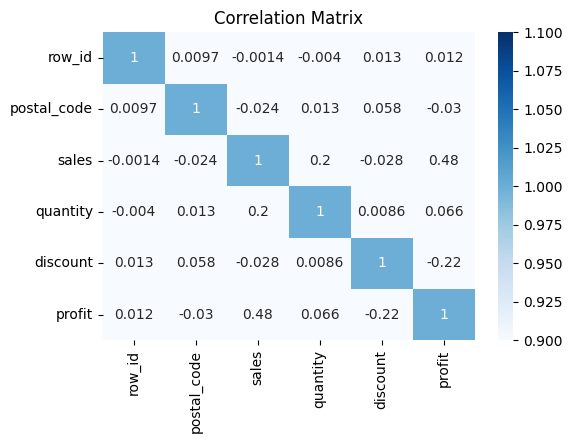

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_data = data.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

<Figure size 400x200 with 0 Axes>

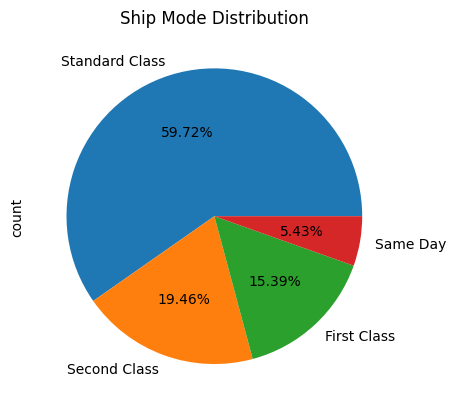

<Figure size 400x200 with 0 Axes>

In [9]:
data.ship_mode.value_counts().plot.pie(autopct='%.2f%%')
plt.title('Ship Mode Distribution')
plt.figure(figsize=(4,2))

<Figure size 500x300 with 0 Axes>

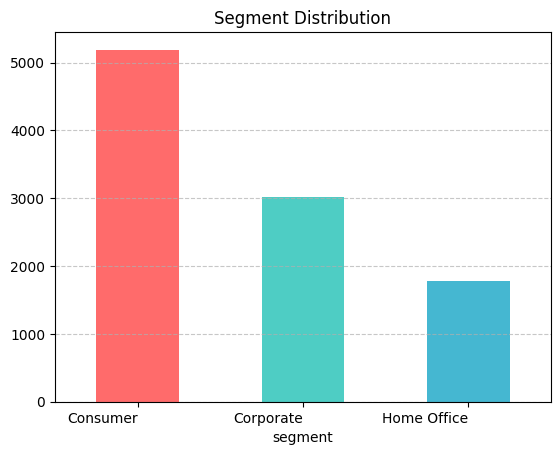

<Figure size 500x300 with 0 Axes>

In [10]:
data.segment.value_counts().plot.bar(color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.xticks(rotation=360, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.title('Segment Distribution')
plt.figure(figsize=(5,3))

In [11]:
data.country.value_counts().reset_index()

,country,count
0,United States,9994


In [12]:
data.city.value_counts().reset_index()

,city,count
0,New York City,915
1,Los Angeles,747
2,Philadelphia,537
3,San Francisco,510
4,Seattle,428
...,...,...
526,Abilene,1
527,Montebello,1
528,Kissimmee,1
529,Danbury,1


<Figure size 500x300 with 0 Axes>

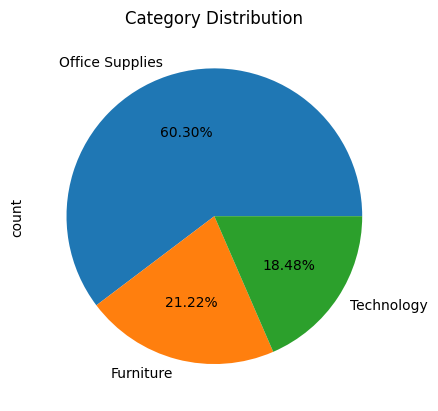

<Figure size 500x300 with 0 Axes>

In [13]:
data.category.value_counts().plot.pie(autopct='%.2f%%')
plt.title('Category Distribution')
plt.figure(figsize=(5,3))

<Figure size 500x300 with 0 Axes>

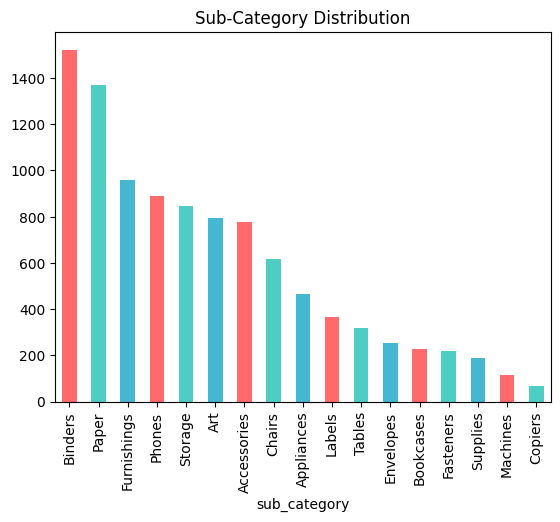

<Figure size 500x300 with 0 Axes>

In [14]:
data.sub_category.value_counts().plot.bar(color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.title('Sub-Category Distribution')
plt.figure(figsize=(5,3))

In [15]:
total_sales = data['sales'].sum()
total_sales

np.float64(2297200.8603000003)

In [16]:
total_profit = data['profit'].sum()
total_profit

np.float64(286397.0217)

In [17]:
data['order_date'] = pd.to_datetime(data['order_date'], errors='coerce')
data['year'] = data['order_date'].dt.year.fillna(0).astype(int)
data = data[data['year'] != 0]

In [18]:
data.columns

Index(['row_id', 'order_id', 'order_date', 'ship_date', 'ship_mode',
       'customer_id', 'customer_name', 'segment', 'country', 'city', 'state',
       'postal_code', 'region', 'product_id', 'category', 'sub_category',
       'product_name', 'sales', 'quantity', 'discount', 'profit', 'year'],
      dtype='object')

<Figure size 500x300 with 0 Axes>

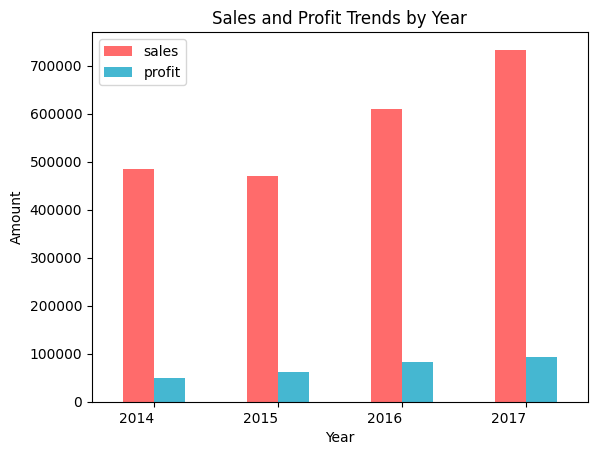

<Figure size 500x300 with 0 Axes>

In [19]:
trends = data.groupby('year').agg({'sales':'sum', 'profit':'sum'}).plot.bar(color=['#FF6B6B', '#45B7D1'])
plt.title('Sales and Profit Trends by Year')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.xticks(rotation=0, ha='right')
plt.figure(figsize=(5,3))

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   row_id         9994 non-null   int64         
 1   order_id       9994 non-null   object        
 2   order_date     9994 non-null   datetime64[ns]
 3   ship_date      9994 non-null   object        
 4   ship_mode      9994 non-null   object        
 5   customer_id    9994 non-null   object        
 6   customer_name  9994 non-null   object        
 7   segment        9994 non-null   object        
 8   country        9994 non-null   object        
 9   city           9994 non-null   object        
 10  state          9994 non-null   object        
 11  postal_code    9994 non-null   int64         
 12  region         9994 non-null   object        
 13  product_id     9994 non-null   object        
 14  category       9994 non-null   object        
 15  sub_category   9994 n

In [21]:
data.year.value_counts()

,count
year,
2017,3312
2016,2587
2015,2102
2014,1993


<Figure size 500x300 with 0 Axes>

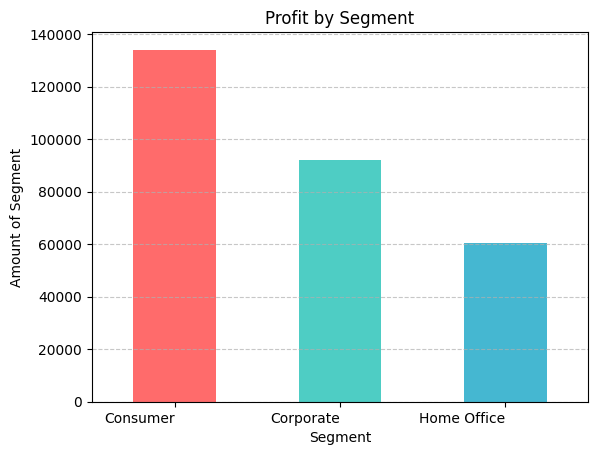

<Figure size 500x300 with 0 Axes>

In [22]:
performance = data.groupby('segment')['profit'].sum().plot.bar(color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.xticks(rotation=0, ha='right')
plt.title('Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Amount of Segment')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.figure(figsize=(5,3))

<Figure size 500x300 with 0 Axes>

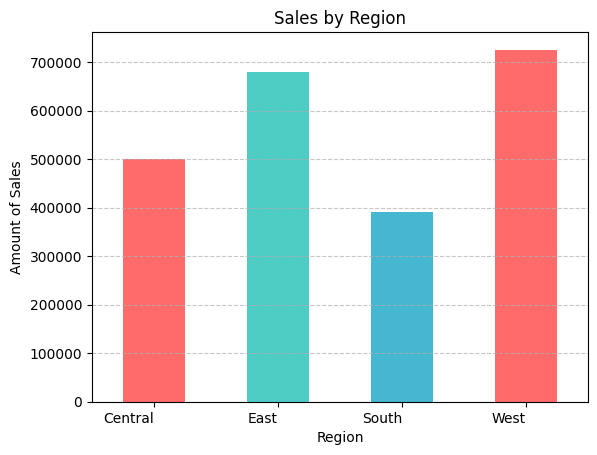

<Figure size 500x300 with 0 Axes>

In [23]:
region_sales = data.groupby('region')['sales'].sum().plot.bar(color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.xticks(rotation=0, ha='right')
plt.title('Sales by Region')
plt.xlabel('Region')
plt.ylabel('Amount of Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.figure(figsize=(5,3))

<Figure size 500x300 with 0 Axes>

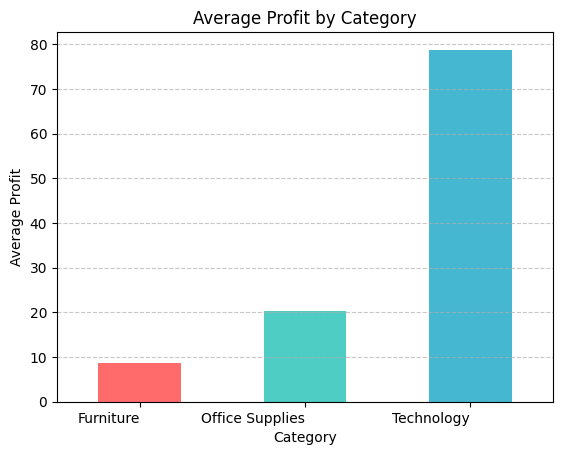

<Figure size 500x300 with 0 Axes>

In [24]:
category_profit = data.groupby('category')['profit'].mean().plot.bar(color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.xticks(rotation=0, ha='right')
plt.title('Average Profit by Category')
plt.xlabel('Category')
plt.ylabel('Average Profit')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.figure(figsize=(5,3))

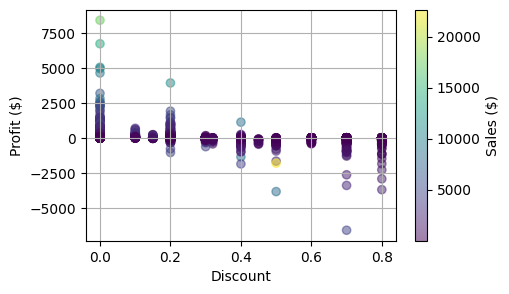

In [25]:
plt.figure(figsize=(5,3))
plt.scatter(data['discount'], data['profit'], c=data['sales'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Sales ($)')
plt.xlabel('Discount')
plt.ylabel('Profit ($)')
plt.grid(True)
plt.show()

<Figure size 500x300 with 0 Axes>

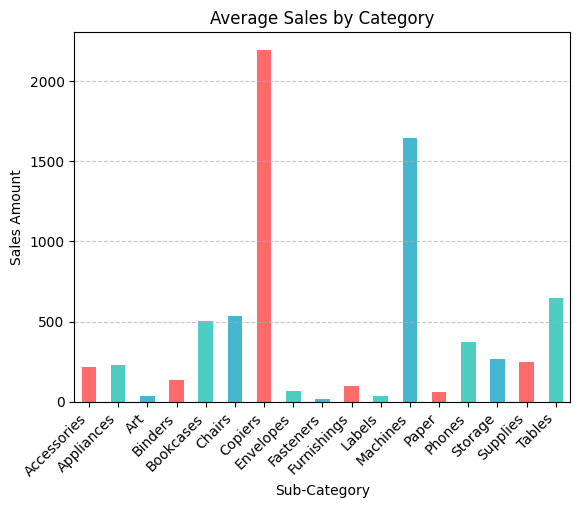

<Figure size 500x300 with 0 Axes>

In [45]:
sub_category_sales = data.groupby('sub_category')['sales'].mean().plot.bar(color=['#FF6B6B', '#4ECDC4', '#45B7D1'])
plt.xticks(rotation=45, ha='right')
plt.title('Average Sales by Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.figure(figsize=(5,3))

In [46]:
products_profit = data.groupby('product_name')['profit'].sum().reset_index()
top_products = products_profit.sort_values(by='profit',ascending=False).head(5)
top_products

,product_name,profit
404,Canon imageCLASS 2200 Advanced Copier,25199.9280
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
805,Hewlett Packard LaserJet 3310 Copier,6983.8836
400,Canon PC1060 Personal Laser Copier,4570.9347
787,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766


In [47]:
total_items = data['quantity'].sum()
unique_total_orders = data['order_id'].nunique()
avg_items_per_order = total_items/unique_total_orders
avg_items_per_order

np.float64(7.560990217608305)

In [48]:
unique_total_orders

5009

In [49]:
total_customers = data['customer_id'].nunique()
total_customers

793

In [50]:
data.to_csv('cleaned_super_store.csv', index=False)
print("\nCleaned data saved as 'cleaned_super_store.csv'")


Cleaned data saved as 'cleaned_super_store.csv'
